In [14]:
from pathlib import Path

import geopandas as gpd
import shapely.geometry as sgeom
import utils

In [2]:
SAVE_KWDS = {"bbox_inches": "tight", "dpi": 300, "facecolor": "w"}
CRS = "esri:102008"

In [3]:
root = Path("..", "data")
out_path = Path(root, "outputs")
img_path = Path(root, "figures")

In [4]:
gulf_east_clip = sgeom.Polygon(
    [
        (-98.0189, 25.6163),
        (-99.0192, 28.2578),
        (-70.0293, 44.8238),
        (-65.9741, 45.6041),
        (-66.4375, 44.5238),
        (-78.9686, 31.6511),
        (-79.75, 24.4402),
        (-83.5973, 24.1171),
        (-91.1961, 28.1507),
        (-96.3344, 25.6423),
        (-98.0189, 25.6163),
    ]
)

east_geo = utils.geo_census("state", gulf_east_clip, "epsg:4326", "east_geo", out_path)
gulf_east = utils.geo_census(
    "coastline", gulf_east_clip, "epsg:4326", "gulf_east_coastline", out_path
)

In [5]:
east_res = gpd.read_feather(Path(out_path, "east_res.feather"))

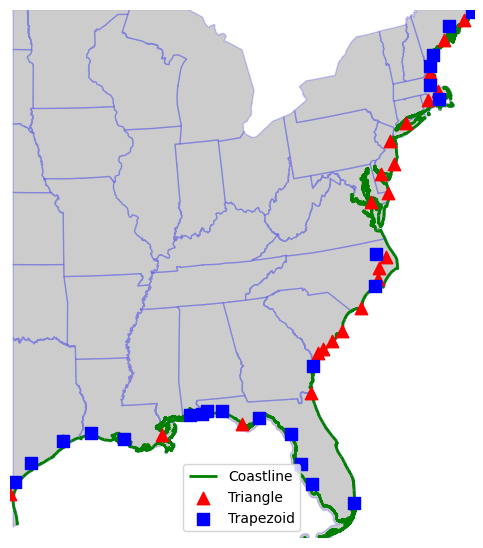

In [13]:
er = east_res.to_crs(CRS)
tri = er[er.Shape == "triangle"]
trp = er[er.Shape == "trapezoid"]
ax = east_geo.plot(facecolor="k", edgecolor="b", alpha=0.2, figsize=(7, 7))
gulf_east.to_crs(CRS).plot(ax=ax, edgecolor="g", lw=2, zorder=1)
tri.plot(ax=ax, markersize=80, marker="^", color="red")
trp.plot(
    ax=ax,
    markersize=80,
    marker="s",
    color="blue",
)
ax.legend(["Coastline", "Triangle", "Trapezoid"], loc="lower center")
ax.axis("off")
ax.margins(0)
ax.figure.set_dpi(100)
ax.figure.savefig(Path(img_path, "east_res_distribution.png"), **SAVE_KWDS)